In [44]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


In [41]:
data = datasets.load_iris()
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


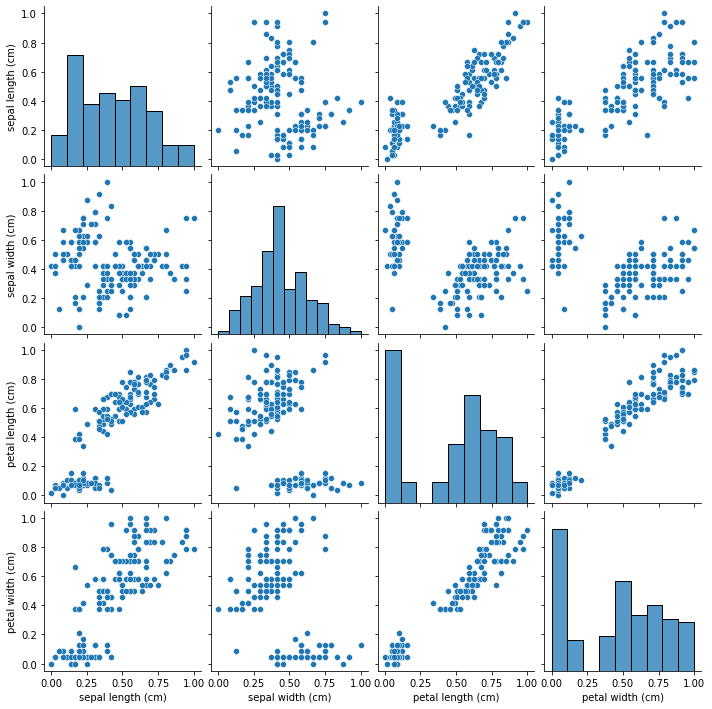

In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(data.data)

df = pd.DataFrame(scaled)
df.columns = data.feature_names

sns.pairplot(df)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


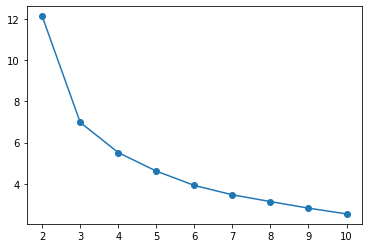

In [58]:
from sklearn.cluster import KMeans
rng = range(2,11)
sse = []
for k in rng:
    km = KMeans(n_clusters=k)
    km.fit(X=df)
    sse.append(km.inertia_)

plt.plot(rng,sse, marker='o')

In [89]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df)

df['cluster'] = y_pred
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


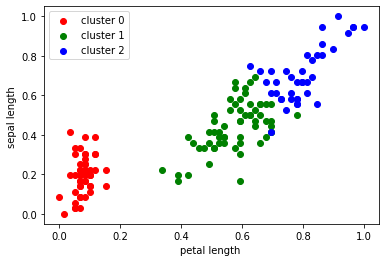

In [111]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

x_ax = 'petal length (cm)'
y_ax = 'sepal length (cm)'

plt.xlabel(x_ax[:-4])
plt.ylabel(y_ax[:-4])
plt.scatter(df1[[x_ax]],df1[[y_ax]], color='r', label='cluster 0')
plt.scatter(df2[[x_ax]],df2[[y_ax]], color='g', label='cluster 1')
plt.scatter(df3[[x_ax]],df3[[y_ax]], color='b', label='cluster 2')
plt.legend()
# plt.scatter(df2, 'r')
# plt.scatter(df3, 'blue')
